In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

## HEAT MAP DISTRIBUTION OF FIXED-FRIDGES

In [ ]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")

In [ ]:
def f(s):
  if geolocator.geocode({"postalcode":s}) == None:
    return (0,0)
  else :
    return geolocator.geocode({"postalcode":s})[1] 

In [ ]:
Z = df["Site Zipcode"]
M= df.groupby("Site Zipcode")["Site Zipcode"].count()
N = np.array(M)
Z = np.sort(Z.unique())


In [ ]:
L = []
for i in Z:
  L.append(f(i))

In [ ]:
np.savetxt('datos2.txt', L)

In [ ]:
L1 = np.loadtxt("datos2.txt")

In [ ]:
# extracting longitude and latitude values to separate lists
longs = [L1[i][1] for i in range(len(L1))]
lats = [L1[i][0] for i in range(len(L1))]
# calculating mean longitude and latitude values
import statistics
meanLong = statistics.mean(longs)
meanLat = statistics.mean(lats)
# create base map object using Map()
mapObj = folium.Map(location=[meanLat, meanLong], zoom_start = 14.5)
# create heatmap layer
heatmap = HeatMap( list(zip(lats, longs, df1["Porcentage"])),
                   min_opacity=0.2,
                   max_val=df1["Porcentage"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(mapObj)
mapObj

In [ ]:
mapObj.save(outfile= "map.html")

In [ ]:
# Reading the data set
df = pd.read_csv("CPT_PREDICTIVE_PPM.csv", encoding='windows-1252')

/home/sjuan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9,12,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h2><b>1. Inspeccionando los datos</b></h2>

In [ ]:
# Shape of the DataFrame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 609989
Number of columns: 20


In [ ]:
# Columns' names
print(df.columns)

Index(['Work Order Number', 'Site Number', 'Site Type', 'Date Created',
       'Date Completed', 'Provider Name', 'WO Current Status',
       'Asset Category', 'Problem Type Name', 'Requested By', 'WO Priority',
       'Manufacturer', 'Asset In-Service Date', 'Level 1 Organization Name',
       'Site Zipcode', 'Sales Sq. Ft.', 'Asset Barcode', 'Client Product Name',
       'Asset Type', 'Asset Status'],
      dtype='object')


In [ ]:
# hacer RegEx para filtrar los más importantes (temperature/maintenance...)
df['Problem Type Name'].unique()

array(['Fixture Critical Over Temperature Alarm',
       'Fixture Critical Under Temperature Alarm',
       'Fixture Critical Alarm', ...,
       'KB - Case Maintenance - Period 8 - Contractual Diligence Visit 4',
       'KB - Case Maintenance - Period 8 - Contractual Diligence Visit 5',
       'Refrigeration Leak Detection Devices'], dtype=object)

In [ ]:
df.head()

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 10:00,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567391,Frozen Food (-18C or less),HALF GLASS DOOR & WELL,In Service
1,12904685,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 09:59,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567398,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
2,12904853,A0892,SUPERMARKET,01/02/2012 05:10,01/02/2012 10:01,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567399,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
3,12927899,A0416,SUPERMARKET,01/02/2012 08:40,02/02/2012 13:03,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,LINDE,01/08/2002 05:00,Region S01,BR4 0PU,13423.0,SSL00225160,"Meat, Fish and Poultry (3C or less)",REMOTE MULTIDECK,In Service
4,12932231,A0003,SUPERMARKET,01/02/2012 13:33,08/02/2012 19:39,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,RADFORD RETAIL SYSTEMS,15/03/2009 04:00,Region S02,DA11 8JH,37870.0,SSL00583503,NaN,FULL GLASS DOOR,Scrapped


* "Work Order Number": número de identifiación de la operación
* "Site Number": número de identifiación del supermercado
* "Site Type": Tipo de tienda o compañia; Supermarket(big) - Convenience(small)
* "Date Created": Fecha y hora en que la alarma se disparó
* "Date Completed": Fecha y hora en que la alarma se silenció
* "Provider Name": Nombre de la compañia de mantenimiento
* "WO Current Status": 
* "Asset Category": Tipo de activo (Refrigerador, aire acondicionado, luz, etc)
* "Problem Type Name": Tipo de alarma (Por qué se prendió la alarma)
* "Requested By": Compañia quién solicita la ayuda
* "WO Priority": 
* "Manufacturer": Fabricante
* "Asset In-Service Date": Fecha y hora cuando se conectó por primera vez el activo
* "Level 1 Organization Name": Región en la cual fue dividida
* "Site Zipcode": Código postal de la tienda
* "Sales Sq. Ft.": Tamaño de la tienda en pies cuadrados
* "Asset Barcode": Código de barras del activo
* "Client Product Name": Nombre del producto del cliente
* "Asset Type": Tipo de activo
* "Asset Status": Estado del activo. Inactivo o Activo - hora de generar el conjunto de datos


In [ ]:
# Types of the elements of each column, nulls and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609989 entries, 0 to 609988
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Work Order Number          609989 non-null  int64  
 1   Site Number                609989 non-null  object 
 2   Site Type                  609989 non-null  object 
 3   Date Created               609989 non-null  object 
 4   Date Completed             577602 non-null  object 
 5   Provider Name              609989 non-null  object 
 6   WO Current Status          609989 non-null  object 
 7   Asset Category             609989 non-null  object 
 8   Problem Type Name          609989 non-null  object 
 9   Requested By               527644 non-null  object 
 10  WO Priority                609989 non-null  object 
 11  Manufacturer               609989 non-null  object 
 12  Asset In-Service Date      506751 non-null  object 
 13  Level 1 Organization Name  60

In [ ]:
# Lower case for strings in the DataFrame 
for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except:
        pass

In [ ]:
df.head()

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,a0892,supermarket,01/02/2012 03:05,01/02/2012 10:00,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567391,frozen food (-18c or less),half glass door & well,in service
1,12904685,a0892,supermarket,01/02/2012 03:05,01/02/2012 09:59,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567398,frozen food (-18c or less),full glass door,in service
2,12904853,a0892,supermarket,01/02/2012 05:10,01/02/2012 10:01,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567399,frozen food (-18c or less),full glass door,in service
3,12927899,a0416,supermarket,01/02/2012 08:40,02/02/2012 13:03,cms solutions limited,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,linde,01/08/2002 05:00,region s01,br4 0pu,13423.0,ssl00225160,"meat, fish and poultry (3c or less)",remote multideck,in service
4,12932231,a0003,supermarket,01/02/2012 13:33,08/02/2012 19:39,cms solutions limited,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,radford retail systems,15/03/2009 04:00,region s02,da11 8jh,37870.0,ssl00583503,NaN,full glass door,scrapped


In [ ]:
# There aren't duplicate rows
df[df.duplicated(keep=False)]

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status


In [ ]:
# There aren't duplicated columns
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Replacing with NaN values if there are any of the symbols "?" and "" 
df = df.replace(r"?", np.nan)
df = df.replace(r"", np.nan)

In [ ]:
# Number of nulls for each column
df.isnull().sum()

Work Order Number                 0
Site Number                       0
Site Type                         0
Date Created                      0
Date Completed                32387
Provider Name                     0
WO Current Status                 0
Asset Category                    0
Problem Type Name                 0
Requested By                  82345
WO Priority                       0
Manufacturer                      0
Asset In-Service Date        103238
Level 1 Organization Name         0
Site Zipcode                      0
Sales Sq. Ft.                129538
Asset Barcode                     0
Client Product Name          142080
Asset Type                    82345
Asset Status                  83984
dtype: int64

In [ ]:
# Total number of nulls or NaN values in the DataFrame
df.isnull().sum().sum()

655917

In [ ]:
# Thera are just two columns with continue (numerical) variables  
df.describe()

,Work Order Number,Sales Sq. Ft.
count,6.099890e+05,480451.000000
mean,2.258053e+07,33424.599678
std,5.329274e+06,17510.817320
min,1.290468e+07,868.000000
25%,1.889841e+07,21863.000000
50%,2.214566e+07,35011.000000
75%,2.693373e+07,45570.000000
max,3.270445e+07,87176.000000


In [ ]:
# IDEAS

# Ver si el tamaño de la tienda tiene alguna relacion (correlacion) con el numero de alarmas en ella
# 

In [ ]:
# New DataFrame without NaN values
df_ = df.dropna()

In [ ]:
# Converting the datatimes columns to a pandas datetime object
times_columns = ['Date Created', 'Date Completed', 'Asset In-Service Date']
for column in times_columns:
  df[column] = pd.to_datetime(df[column], format='%d/%m/%Y %H:%M')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609989 entries, 0 to 609988
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Work Order Number          609989 non-null  int64         
 1   Site Number                609989 non-null  object        
 2   Site Type                  609989 non-null  object        
 3   Date Created               609989 non-null  datetime64[ns]
 4   Date Completed             577602 non-null  datetime64[ns]
 5   Provider Name              609989 non-null  object        
 6   WO Current Status          609989 non-null  object        
 7   Asset Category             609989 non-null  object        
 8   Problem Type Name          609989 non-null  object        
 9   Requested By               527644 non-null  object        
 10  WO Priority                609989 non-null  object        
 11  Manufacturer               609989 non-null  object  

In [ ]:
#Completar datos/Ver que hacer con NaN
#Eliminar valores atipicos

<AxesSubplot:>

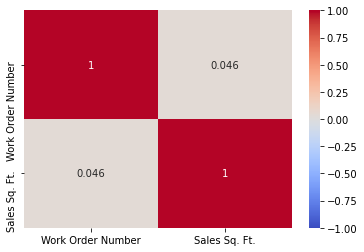

In [ ]:
#Necesitamos más variables numericas
corr= df.corr()
sns.heatmap(data=corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm',)

In [ ]:
#Estandarizar y normalizar
#OHE para variables categoricas

## Analisis para regresión

In [ ]:
df_regresion = df.copy()

In [ ]:
df_regresion = df_regresion.drop(['Work Order Number', 'Date Completed', 'WO Current Status', 'Asset Category', 'Problem Type Name', 'Requested By', 'WO Priority',  \
                   'Manufacturer', 'Asset In-Service Date', 'Level 1 Organization Name', 'Asset Barcode', 'Client Product Name', \
                   'Asset Type', 'Asset Status'], axis=1)

In [ ]:
df_regresion['year'] = df_regresion['Date Created'].apply(lambda t: t.year)
df_regresion['month'] = df_regresion['Date Created'].apply(lambda t: t.month)

df_regresion = df_regresion.drop(['Date Created'], axis=1)

In [ ]:
df_regresion

,Site Number,Site Type,Provider Name,Site Zipcode,Sales Sq. Ft.,year,month
0,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
1,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
2,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
3,a0416,supermarket,cms solutions limited,br4 0pu,13423.0,2012,2
4,a0003,supermarket,cms solutions limited,da11 8jh,37870.0,2012,2
...,...,...,...,...,...,...,...
609984,a4994,convenience store,space engineering services ltd,cv22 5ez,NaN,2015,9
609985,a4542,convenience store,space engineering services ltd,bs21 7ph,NaN,2015,9
609986,a4357,convenience store,space engineering services ltd,wv3 9qz,NaN,2015,9
609987,a4719,convenience store,carter refrigeration,ls25 1ds,1547.0,2015,9


In [ ]:
# All nulls belong to Sales Sq. Ft. column
df_regresion.isna().sum()

Site Number           0
Site Type             0
Provider Name         0
Site Zipcode          0
Sales Sq. Ft.    129538
year                  0
month                 0
dtype: int64

In [ ]:
df_regresion = df_regresion.fillna(0)

In [ ]:
df_regresion['Site Number'].nunique()

1626

In [ ]:
abr = df_regresion.groupby(['Site Number','Site Zipcode','Sales Sq. Ft.','Site Type','year', 'month', 'Provider Name']).year.count()
abr

Site Number  Site Zipcode  Sales Sq. Ft.  Site Type    year  month  Provider Name        
a0002        e15 1xe       11846.0        supermarket  2012  2      cms solutions limited     7
                                                             3      cms solutions limited     8
                                                             4      cms solutions limited    12
                                                             5      cms solutions limited     7
                                                             6      cms solutions limited    10
                                                                                             ..
p2835        bl3 6dh       0.0            pfs          2014  8      cbes                      5
                                                             9      cbes                      1
                                                             10     cbes                      3
                                              

In [ ]:
df_regresion.groupby(['Site Number','Site Zipcode','Sales Sq. Ft.','Site Type','year', 'month', 'Provider Name']).year.count()

Site Number  Site Zipcode  Sales Sq. Ft.  Site Type    year  month  Provider Name        
a0002        e15 1xe       11846.0        supermarket  2012  2      cms solutions limited     7
                                                             3      cms solutions limited     8
                                                             4      cms solutions limited    12
                                                             5      cms solutions limited     7
                                                             6      cms solutions limited    10
                                                                                             ..
p2835        bl3 6dh       0.0            pfs          2014  8      cbes                      5
                                                             9      cbes                      1
                                                             10     cbes                      3
                                              

In [ ]:
myList = []
for i in range(len(abr)):
  a = list(abr.index[i])
  a.append(abr[i])
  myList.append(a)

In [ ]:
df_intento = pd.DataFrame(myList, columns = ['Site Number', 'Site Zipcode', 'Sales Sq. Ft.','Site Type','Year','Month','Provider Name','Number of Alarms'])

In [ ]:
df_intento

,Site Number,Site Zipcode,Sales Sq. Ft.,Site Type,Year,Month,Provider Name,Number of Alarms
0,a0002,e15 1xe,11846.0,supermarket,2012,2,cms solutions limited,7
1,a0002,e15 1xe,11846.0,supermarket,2012,3,cms solutions limited,8
2,a0002,e15 1xe,11846.0,supermarket,2012,4,cms solutions limited,12
3,a0002,e15 1xe,11846.0,supermarket,2012,5,cms solutions limited,7
4,a0002,e15 1xe,11846.0,supermarket,2012,6,cms solutions limited,10
...,...,...,...,...,...,...,...,...
57658,p2835,bl3 6dh,0.0,pfs,2014,8,cbes,5
57659,p2835,bl3 6dh,0.0,pfs,2014,9,cbes,1
57660,p2835,bl3 6dh,0.0,pfs,2014,10,cbes,3
57661,p2835,bl3 6dh,0.0,pfs,2014,11,cbes,1


In [ ]:
df_intento['Site Number'].nunique()

1626

In [ ]:
df_regresion['Site Number'].nunique() - df_intento['Site Number'].nunique()

0

## Sklearn

In [ ]:
from sklearn.utils import shuffle
df_intento = shuffle(df_intento)

In [ ]:
# matriz de características
X = df_intento.drop(columns=['Number of Alarms'])

# variable objetivo
y = df_intento[['Number of Alarms']]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_imputer = SimpleImputer()
scale = StandardScaler()
cat_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

num_tra = make_pipeline(num_imputer, scale)
num_n_tra = make_pipeline(num_imputer)
cat_tra = make_pipeline(cat_imputer,ohe)
cat_n_tra = make_pipeline(cat_imputer)

In [ ]:
from sklearn.compose import make_column_transformer
num_cols = ['Sales Sq. Ft.']
num_n_cols = ['Year', 'Month']
cat_cols = ['Site Number','Site Zipcode', 'Site Type','Provider Name']
cat_n_cols = []

preprocessor = make_column_transformer((num_tra, num_cols),
                                       (cat_tra, cat_cols),
                                       (num_n_tra, num_n_cols),
                                       (cat_n_tra, cat_n_cols))

In [ ]:
X_trans = preprocessor.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# from sklearn.linear_model import ElasticNet


LR = LinearRegression()
clf = Ridge(alpha=1)

# #model = make_pipeline(preprocessor,LR)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans ,y ,test_size = 0.25, random_state= 42 )

clf.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
clf.score(X_test,y_test)

0.3176522807971376

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
model = Ridge()
#cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0.9,1.01,0.01)
search = GridSearchCV(model,grid,scoring='neg_mean_absolute_error', n_jobs=None)
results = search.fit(X_train, y_train)
print('Config: %s' % results.best_params_)

Config: {'alpha': 1.0}


In [ ]:
import pickle

pkl_filename = '32-3_model.pkl'

with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)
    


In [ ]:
with open('preprocessor.pkl','wb') as file:
    pickle.dump(preprocessor, file)

In [ ]:
df__ = df.copy()
df__['fixtime'] = df__['Date Completed'] - df__['Date Created']

In [ ]:
df__['fixtime'] = pd.to_timedelta(df__.fixtime).dt.total_seconds()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.barplot(y='Provider Name', x='fixtime', data=df__)